In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Adiquirindo dados

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


### Verificando dados faltantes

In [3]:
data.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

Não possui dados faltantes

### Análise exploratória

In [4]:
data.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [5]:
data.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


Existe uma correlação entre as variáveis horas de estudo e salário.

### Iniciando os dados de machine learning para a biblioteca scikit-learn

In [6]:
X = np.array(data["horas_estudo_mes"])
X = X.reshape(-1, 1)
Y = data["salario"]

Atribuindo as variáveis de X e Y para o modelo de machine learning.
- X - horas de estudo logo o dado que será utilizado para prever o salário
- Y - salário logo o dado que será previsto

### Reservando 20% dos dados para teste

In [7]:
X_Treino, X_teste, Y_treino, Y_teste = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

### Treinando modelo

In [8]:
modelo = LinearRegression()
modelo.fit(X_Treino, Y_treino)

LinearRegression()

### Avaliando modelo utilizando gráfico

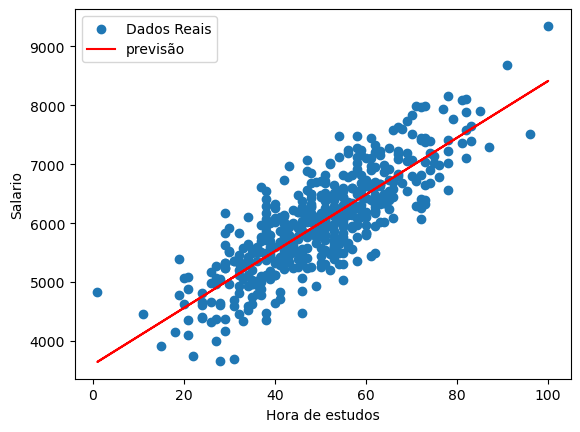

In [9]:
plt.scatter(X, Y, label="Dados Reais")
plt.plot(X, modelo.predict(X), color="red", label="previsão")
plt.xlabel("Hora de estudos")
plt.ylabel("Salario")
plt.legend()

### Pontuação do modelo

In [10]:
modelo.score(X_teste, Y_teste)

0.5939334693606821

Score do modelo é de 0.59. O modelo não é muito preciso, mas é um bom começo.

### Valores w0 e w1

In [11]:
print(modelo.coef_)
print(modelo.intercept_)

[48.18185277]
3596.7837243727527


Valores de modelo.coef_ e modelo.intercept_ são respectivamente a e b da equação y = ax + b.

### Exemplo de previsão

In [12]:
horas_estudo_novo = np.array([[40]])
salario_previsto = modelo.predict(horas_estudo_novo)
salario_previsto
print(f"O salario previstro é", salario_previsto[0])

O salario previstro é 5524.057835230207


In [13]:
horas_estudo_novo = 40
salario_previsto = modelo.intercept_ + modelo.coef_ * horas_estudo_novo
print(f"O salario previstro é", salario_previsto[0])

O salario previstro é 5524.057835230207
